In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

url_1= 'https://media.githubusercontent.com/media/takanju/wids_datathon_2021/master/Data/TrainingWiDS2021.csv'
url_2 = 'https://media.githubusercontent.com/media/takanju/wids_datathon_2021/master/Data/UnlabeledWiDS2021.csv'

In [2]:
# Splitted data to make same shape of both test and train so that we can apply pre processing on both
# Ref : https://www.kaggle.com/siavrez/2020fatures
medical_data = pd.read_csv(url_1, error_bad_lines=False, index_col=0)
train = medical_data.copy()
test_df = pd.read_csv(url_2, error_bad_lines=False, index_col=0)
y = train["diabetes_mellitus"]
del train['diabetes_mellitus']

Exploratory Data Analysis (EDA)

In [3]:
train.shape

(130157, 179)

In [4]:
# what data types how many cols
train.dtypes.value_counts()

float64    157
int64       16
object       6
dtype: int64

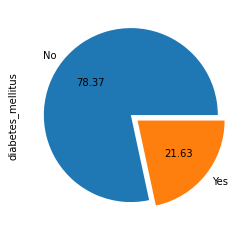

In [5]:
#Plot diabetes_mellitus counts to verify the distribution of data
target = 'diabetes_mellitus'
medical_data[target].value_counts().plot(kind="pie", explode=[0,0.1], autopct="%.2f", labels=["No","Yes"])
plt.show()


In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(train.head(2))
    display(train.describe())
    display(test_df.head(2))
    display(test_df.describe())

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,118827.000000,118827

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,82,admit,Med-Surg ICU,0.015278,0,NaN,2.8,110.0,104.01,0,0,1.9,44.0,1.49,NaN,4.0,6.0,0.0,5.0,97.0,38.0,39.9,0,54.0,NaN,NaN,NaN,NaN,31.0,130.0,36.4,NaN,0,5.4,NaN,NaN,104.0,40.0,104.0,40.0,66.0,38.0,NaN,NaN,123.0,54.0,123.0,54.0,35.0,15.0,100.0,96.0,NaN,NaN,149.0,76.0,149.0,76.0,38.7,35.6,NaN,NaN,59.0,59.0,59.0,59.0,46.0,44.0,NaN,NaN,80.0,80.0,80.0,80.0,19.0,19.0,97.0,96.0,NaN,NaN,116.0,116.0,116.0,116.0,36.4,36.4,2.8,2.8,1.9,1.9,44.0,40.0,9.8,9.3,1.49,1.44,104.0,97.0,26.0,23.0,14.5,14.2,42.8,39.9,NaN,NaN,NaN,NaN,173.0,173.0,5.7,4.9,132.0,130.0,5.6,5.4,2.8,2.8,1.9,1.9,40.0,40.0,9.8,9.8,1.49,1.49,104.0,104.0,26.0,26.0,14.5,14.5,42.8,42.8,NaN,NaN,NaN,NaN,173.0,173.0,4.9,4.9,132.0,132.0,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,82,admit,Med-Surg ICU,0.000000,0,NaN,NaN,117.0,106.01,0,0,NaN,19.0,0.92,NaN,4.0,6.0,0.0,5.0,73.0,116.0,NaN,0,41.0,NaN,NaN,NaN,NaN,53.0,142.0,36.3,NaN,0,NaN,NaN,NaN,101.0,27.0,101.0,27.0,116.0,56.

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,10234.000000,10234.000000,10234.000000,9219.000000,10234.000000,9933.000000,10234.000000,10234.000000,10234.0,9326.000000,4179.000000,10064.000000,10126.000000,10234.000000,10234.000000,3924.000000,8173.000000,8191.000000,2599.000000,10029.000000,10029.000000,10173.000000,10029.000000,9024.000000,10204.000000,8120.000000,10234.000000,10182.000000,2599.000000,2599.000000,2599.000000,2599.000000,10170.000000,8241.000000,9563.000000,5044.000000,10234.000000,7858.000000,2909.000000,2909.000000,10211.000000,10211.000000,10085.000000,10085.000000,10210.000000,10210.000000,2919.000000,2919.000000,10197.000000,10197.000000,10022.000000,10022.000000,10179.000000,10179.000000,10172.000000,10172.000000,2912.000000,2912.000000,10211.000000,10211.000000,10086.000000,10086.000000,9804.000000,9804.000000,2061.000000,2061.000000,9582.000000,9582.000000,9078.000000,9078.000000,9683.000000,9683.000000,2048.000000,2048.000000,9437.000000,9437.000000,8845.000000,8845.000000,9510.000000,9510.000000,9508.000000,9508.000000,2064.000000,2064.000000,9583.000000,9583.000000,9079.000000,9079.000000,7580.000000,7580.000000,4694.000000,4694.000000,4374.000000,4374.000000,9126.000000,9126.000000,8832.000000,

In [7]:
# Percentage of missing values 

pd.DataFrame(train.isna().sum()*100/len(train))

,0
encounter_id,0.000000
hospital_id,0.000000
age,3.832295
bmi,3.449680
elective_surgery,0.000000
...,...
hepatic_failure,0.000000
immunosuppression,0.000000
leukemia,0.000000
lymphoma,0.000000


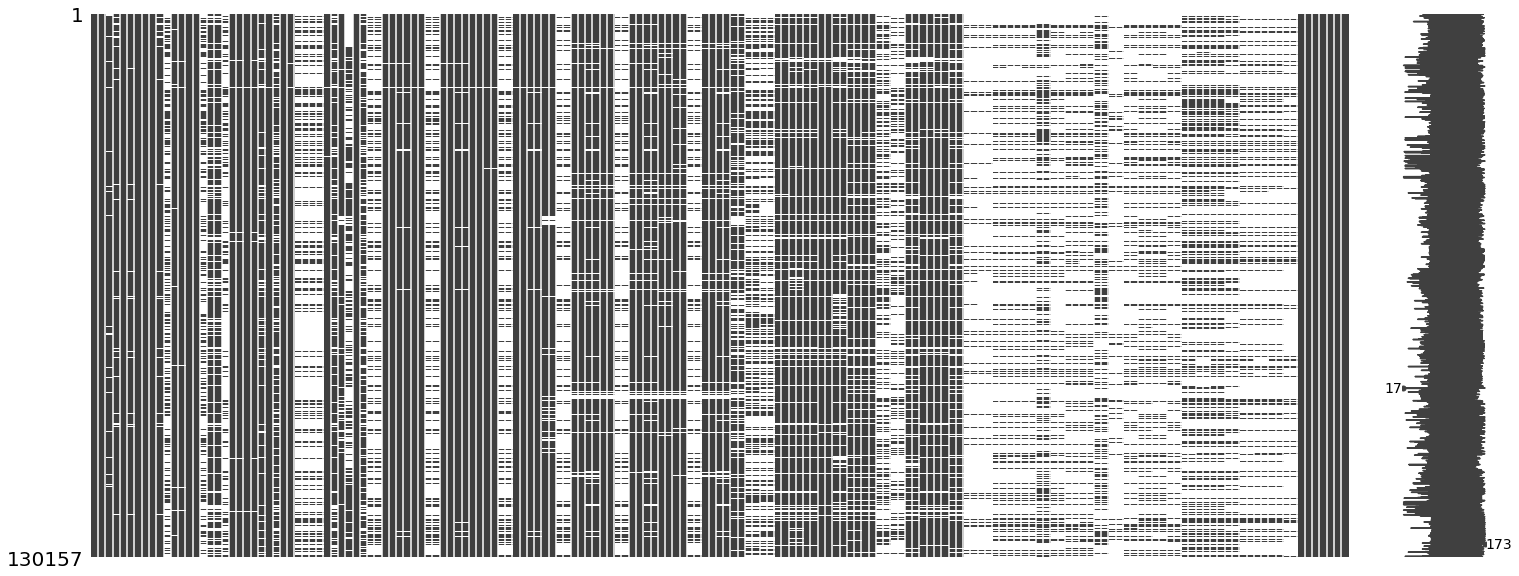

In [8]:
#plot the missing value graph
msno.matrix(train.select_dtypes(include=[np.number]))
plt.show()

In [9]:
# gender with respect to target variable
fig = px.histogram(medical_data, x='gender', y=y, title="Gender wrt diabetes_mellitus", width=600, height=450)
fig.show()

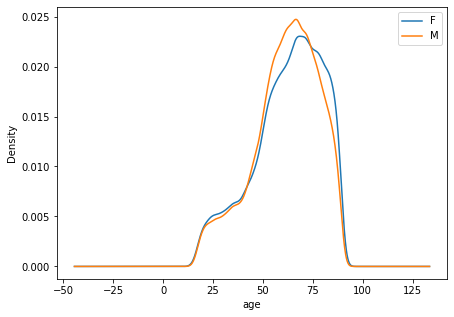

In [10]:
#let's see te age distribution of Male and Female
#pd.crosstab(train['age'],train['gender'])

plt.rcParams['figure.figsize'] = (7,5)
train.groupby('gender')['age'].plot(kind="kde")
plt.xlabel("age")
plt.legend(loc="best")
plt.show()

In [11]:
train['ethnicity'].value_counts()

Caucasian           100236
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
Native American        915
Name: ethnicity, dtype: int64

In [12]:
fig = px.histogram(medical_data, x='icu_stay_type', y=target, width=600, height=450, title="icu_stay_type wrt target")
fig.show()

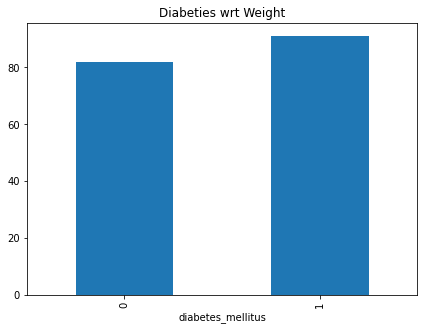

In [13]:
#Did Diabetic Person Weight more?
medical_data.groupby(target)['weight'].mean().plot(kind="bar")
plt.title("Diabeties wrt Weight")
plt.show()

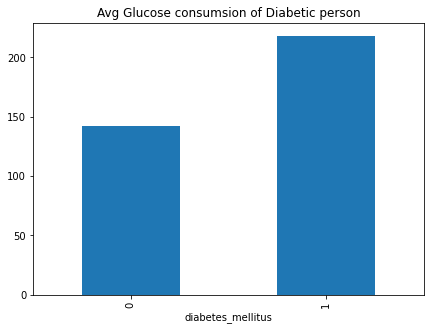

In [14]:
# diabetic patient assumes to consume more glucose
medical_data.groupby(target)['glucose_apache'].mean().plot(kind="bar",title="Avg Glucose consumsion of Diabetic person")
plt.show()

#Diabetic Person weight much more then Non-Diabetic.
#This could happen because their body consumes lot of glucose from food as we have seen which results in weight gain

# Pre processing 

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

def preProcessing1(df: pd.DataFrame, y:pd.Series) -> pd.DataFrame:
    columns=df.columns

    #dropping column which are either irrelevant or around 50% of missing values
    df=df.drop(['encounter_id', 'hospital_id', 'icu_id', 'albumin_apache','bilirubin_apache','fio2_apache','paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache', 'urineoutput_apache'], axis=1)

    #separating categorical & numerical features
    df_cat = df.select_dtypes("object")
    df_num = df.select_dtypes("number")
    cat_cal = df_cat.columns
    num_cal = df_num.columns

    #imputing categorical features by mode
    impute_size1=SimpleImputer(strategy="most_frequent") 
    df_cat = impute_size1.fit_transform(df_cat)
    df_cat = pd.DataFrame(df_cat, columns = cat_cal)

    #imputing numerical features by mean
    impute_size2=SimpleImputer(missing_values=np.nan, strategy="mean") 
    df_num = impute_size2.fit_transform(df_num)
    df_num = pd.DataFrame(df_num, columns = num_cal)

    #concatenating both categorical & numerical features
    df = df_cat.join(df_num)
    return df, [impute_size1, impute_size2 ]

    #Standardization
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(df_num)
    df_num_scale = pd.DataFrame(data=scaled_df, columns=columns)

    #One Hot Encoding
    columnTransformer = ColumnTransformer([('encoder',
                                        OneHotEncoder(),
                                        [0])],
                                     remainder='passthrough')
    onehotencoder = OneHotEncoder()
    df_cat_encod = np.array(columnTransformer.fit_transform(df_cat), dtype = np.str)

    return df, [impute_size1, impute_size2, scaler, df_cat_encod ]



In [16]:
#!pip install tqdm
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from scipy import stats, special
import pandas as pd
import numpy as np
import os
import warnings
warnings.simplefilter("ignore")

# Ref: https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression

# filling missing values based on linear regression and the most correlated variables
# linear regression -> F-test (which columns are mostly related with the given target column, other than "diabetes")
# Multi-colinearity
# target = diabetes
# Remove features which has more than 50% percentage of missing values
# Return reduced dataset

# Linear Regression
def fillna_using_linear_model(df: pd.DataFrame):
    fea_cols=[]
    for col in df.columns:
        if df[col].dtype=='float64':
            fea_cols.append(col)

    correl = df[fea_cols].corr()

    for col in tqdm(fea_cols):
        nan_ratio = df[col].isnull().sum() / df.shape[0]
        if nan_ratio > 0:
            best_nan_ratio = nan_ratio
            best_col = None
            for id in correl.loc[(correl[col] > 0.7) | (correl[col] < -0.7), col].index:
                nan_temp_ratio = df[id].isnull().sum() / df.shape[0]
                if best_nan_ratio > nan_temp_ratio:
                    best_nan_ratio = nan_temp_ratio
                    best_col = id
            if best_col != None:
                sub = df[[col, best_col]].copy()
                sub = sub.dropna()
                reg = LinearRegression(fit_intercept=True).fit(np.expand_dims(sub[best_col], axis=1), sub[col])
                print(reg.score(np.expand_dims(sub[best_col], axis=1), sub[col]))
                if reg.score(np.expand_dims(sub[best_col], axis=1), sub[col])>0.7:
                    if df.loc[(~df[best_col].isnull()) & (df[col].isnull()), col].shape[0] > 0:
                        df.loc[(~df[best_col].isnull()) & (df[col].isnull()), col] = \
                        reg.predict(np.expand_dims(df.loc[(~df[best_col].isnull()) & (df[col].isnull()), best_col], axis=1))

    return df


def preProcessing2(df: pd.DataFrame, y:pd.Series) -> pd.DataFrame:
    columns=df.columns

    # Replace values such as +,- ininity with nan
    df = df.replace([np.inf, -np.inf], np.nan)

    # Linear regression
    linReg = fillna_using_linear_model(df)

    # Simple Imputing
    imputer = SimpleImputer(strategy="mean")
    imputed_df = pd.DataFrame(imputer.fit_transform(linReg.values))

    # Standardization
    scaler = StandardScaler()
    scaled_df = scaler.fit_transform(imputed_df)
    df= pd.DataFrame(data=scaled_df, columns=columns)

    return df, [imputer, scaler]

# dd = preProcessing2(medical_data.copy(), y)
# dd


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # MICE 
from sklearn.preprocessing import StandardScaler
# from discretization import MDLP
# from mdlp.discretization import MDLP

def preProcessing3(df: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    columns = df.columns

    # Log transform for skewing data
    # https://stats.stackexchange.com/questions/267078/why-is-skewed-data-not-preferred-for-modelling
    # https://stats.stackexchange.com/questions/299154/the-benefit-of-unskewing-skewed-data
    logs_transform_list = ['d1_bilirubin_min', 'd1_bilirubin_max', 'd1_glucose_max', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min']
    df[logs_transform_list] = np.log2(df[logs_transform_list])

    # Simple Imputing
    imputer = SimpleImputer(strategy="mean")
    imputed_df = imputer.fit_transform(df.values)

    # Standardization
    scaler = StandardScaler()
    imputed_scaled_df = scaler.fit_transform(imputed_df)

    df = pd.DataFrame(columns=columns, data=imputed_scaled_df)

    return df, [{"columns": logs_transform_list, "transform": np.log2}, imputer, scaler]

In [18]:
#ref: https://www.kaggle.com/lhagiimn/7th-place-solution-wids-2021
#ref:https://www.kaggle.com/letianyu/wids-2021-notebook

def remove_NaN_Values(df, threshold):
    # store the name of columns
    # drop the same for the test set (later)
    NaN_cols = []
    for col in df.columns:
        NaN_ratio = df[col].isnull().sum() / df.shape[0]
        if NaN_ratio >= threshold:
            NaN_cols.append(col)
    df = df.drop(NaN_cols, axis=1)
    return df,NaN_cols

def preProcessing4(df: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    columns = df.columns

    Removed_NaN_df,NaN_cols = remove_NaN_Values(df,0.5)

    return Removed_NaN_df, NaN_cols


# Combine all pre processings 
# Preprocessed Train Data

In [19]:
df1 = train.iloc[:, :45]
prep_df1, tf1 = preProcessing1(df1, y)
prep_df1.index = train.index

df2 = train.iloc[:, 45:90]
prep_df2, tf2 = preProcessing2(df2, y)
prep_df2.index =train.index

df3 = train.iloc[:, 90:135]
prep_df3, tf3 = preProcessing3(df3, y)
prep_df3.index = train.index

df4 = train.iloc[:, 135:]
prep_df4, tf4 = preProcessing4(df4, y)
prep_df4.index = prep_df1.index

prep_df = pd.concat([prep_df1, prep_df2, prep_df3, prep_df4], axis=1)

print(f'Percent of Nans: {round(prep_df.copy().isna().sum().sum()/len(prep_df.copy()), 2)}')

 47%|████▋     | 21/45 [00:00<00:00, 91.03it/s]

0.563520769020351
0.9933743343176455
0.9932092949406126
0.5556868832041206
0.6232299891476356
0.5630410484129751
0.6303842387953887
0.5152979908671131


 67%|██████▋   | 30/45 [00:00<00:00, 83.25it/s]

0.9928207761805053
0.9913514557124004
0.5060654310356865
0.9694702204192752
0.9658512634599362
0.6155171814780587
0.4995490764788873
0.7162536393951131


100%|██████████| 45/45 [00:00<00:00, 81.02it/s]

0.7618525388005946
0.972967652946108
0.9928344337233268
0.6277670731828182


Percent of Nans: 0.0


In [20]:
prep_df


,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,...,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,Caucasian,M,Floor,Floor,admit,CTICU,68.0,22.732803,0.0,180.3,0.541667,0.0,73.900000,113.0,502.01,0.0,0.0,31.00000,2.510000,3.00000,6.000000,0.000000,4.000000,168.000000,118.0,27.400000,0.0,40.0,36.0,134.00000,39.3,0.0,14.100000,46.000000,-2.263705e+00,-1.021561,-0.961156,-1.022551,-0.961035,0.715059,...,0.173974,-1.032708,7.029495e-01,6.813059e-01,1.447755e-01,-1.470849e-01,-1.358202,-1.781292e+00,-1.273077,-9.150112e-01,-1.231255e+00,-0.867446,-7.651534e-16,-4.908909e-16,-1.028196e+00,-1.012208e+00,0.326924,0.466723,-3.991487e-01,-9.608466e-01,-6.884018e-01,-0.790916,0.247186,5.080876e-01,0.000000,0.000000,-3.342983e-16,5.014279e-16,-2.068445e-15,2.068370e-15,4.610996e-15,9.092629e-15,-6.395302e-16,0,0,0,0,0,0,0
2,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,77.0,27.421875,0.0,160.0,0.927778,0.0,70.200000,108.0,203.01,0.0,0.0,9.00000,0.560000,1.00000,3.000000,0.000000,1.000000,145.000000,120.0,36.900000,0.0,46.0,33.0,145.00000,35.1,1.0,12.700000,79.261563,1.074476e-15,0.318971,-1.409491,0.318008,-1.408843,0.669523,...,0.318689,-0.222395,-5.418594e-01,-6.322180e-01,-2.245240e-01,3.666014e-01,0.634439,6.104791e-01,-0.079479,9.075116e-02,4.033445e-01,0.494961,-4.786219e-01,-3.614018e-01,3.663333e-01,1.334897e+00,4.234390,3.579544,-8.368204e-02,-2.346594e-01,1.278805e+00,1.565377,1.704645,2.541737e-01,0.000000,0.000000,-3.342983e-16,5.014279e-16,-2.680873e+00,-2.677447e+00,8.457641e-01,8.572557e-01,-1.391968e+00,0,0,0,0,0,0,0
3,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,25.0,31.952749,0.0,172.7,0.000694,0.0,95.300000,122.0,703.03,0.0,0.0,25.71807,1.481629,3.00000,6.000000,0.000000,5.000000,160.141416,102.0,32.975817,0.0,68.0,37.0,137.94526,36.7,0.0,12.187662,79.261563,1.074476e-15,-0.028574,-0.139207,-0.029545,-0.140056,-0.332266,...,0.000000,0.000000,-4.606718e-16,-1.746472e-16,1.544214e-15,3.842064e-16,0.000000,7.724798e-16,0.000000,-1.624175e-15,1.222582e-15,0.000000,-7.651534e-16,-4.908909e-16,-2.814979e-16,-4.169296e-16,0.000000,0.000000,1.400953e-15,-8.062298e-16,6.212377e-15,0.000000,0.000000,3.221725e-16,0.000000,0.000000,-3.342983e-16,5.014279e-16,-2.068445e-15,2.068370e-15,4.610996e-15,9.092629e-15,-6.395302e-16,0,0,0,0,0,0,0
4,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,81.0,22.635548,1.0,165.1,0.000694,0.0,61.700000,203.0,1206.03,1.0,0.0,25.71807,1.481629,4.00000,6.000000,0.000000,5.000000,185.000000,114.0,25.900000,1.0,60.0,4.0,137.94526,34.8,1.0,8.000000,62.000000,-2.566143e+00,-2.014547,-0.587543,-2.015557,-0.587863,0.578451,...,0.000000,0.000000,-4.606718e-16,-1.746472e-16,3.865564e-01,-7.148435e-01,0.000000,7.724798e-16,0.069721,-9.150112e-01,-9.563844e-02,-1.102344,3.826981e-02,-8.035570e-01,-2.814979e-16,-4.169296e-16,-0.095179,-1.861766,1.178185e+00,-7.792998e-01,6.21237

In [21]:
#Check null values 

pd.DataFrame(prep_df.isna().sum()*100/len(prep_df))

,0
ethnicity,0.0
gender,0.0
hospital_admit_source,0.0
icu_admit_source,0.0
icu_stay_type,0.0
...,...
hepatic_failure,0.0
immunosuppression,0.0
leukemia,0.0
lymphoma,0.0


## Preprocessed Test data

In [22]:
#Preprocessing Test dataset

test_df1 = test_df.iloc[:, :45]
prep_tf1,tff = preProcessing1(test_df1, y)
prep_tf1.index = test_df.index

test_df2 = test_df.iloc[:, 45:90]
prep_tf2,tff = preProcessing2(test_df2, y)
prep_tf2.index = test_df.index

test_df3 = test_df.iloc[:, 90:135]
prep_tf3,tff = preProcessing3(test_df3, y)
prep_tf3.index = test_df.index

test_df4 = test_df.iloc[:,135:]
prep_tf4,tff = preProcessing4(test_df4, y)
prep_tf4.index = test_df.index

prep_tf = pd.concat([prep_tf1, prep_tf2, prep_tf3, prep_tf4], axis=1)
prep_tf

 71%|███████   | 32/45 [00:00<00:00, 159.78it/s]

0.5740782977537242
0.9959604132855211
0.9939566103365394
0.6873459768647066
0.7132558554071958
0.6937095501494343
0.994802287622916
0.5460904640423478
0.6154658812911247
0.996305317029007
0.605693052499227
0.5235209259150457
0.9954147514843418
0.9690914166433615
0.5998422748974985


100%|██████████| 45/45 [00:00<00:00, 158.64it/s]


0.5068160737823504
0.7211500752885533
0.49138699707961014
0.9770157090981717
0.4948704572996141


,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,...,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,Caucasian,F,Floor,Accident & Emergency,admit,Med-Surg ICU,72.0,29.116463,0.0,152.4,0.015278,0.0,83.478729,110.0,104.01,0.0,0.0,44.000000,1.490000,4.0,6.0,0.0,5.0,97.000000,38.0,39.900000,0.0,54.0,31.0,130.000000,36.4,0.0,5.400000,80.118589,0.0,0.845979,-0.727275,0.844240,-0.726652,-1.666605,...,2.140581,1.645429e+00,5.955470e-02,1.288569e-01,-1.087316e+00,-0.499297,0.352949,-7.596456e-02,1.524093,1.525188,1.452670e+00,1.127779e+00,-6.982014e-16,-9.512146e-16,2.924590e-16,8.223296e-16,-3.611931e-01,-0.221644,2.368800,1.839880,-1.570292e+00,-1.667247e+00,-1.111864,-1.056512e+00,-9.957046e-01,-9.854868e-01,4.186649,4.188391e+00,2.362019e+00,2.365769,4.098136e+00,4.126368e+00,-0.002159,0,0,0,0,0,0,0
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,86.0,29.116463,0.0,175.3,0.000000,0.0,83.478729,117.0,106.01,0.0,0.0,19.000000,0.920000,4.0,6.0,0.0,5.0,73.000000,116.0,32.888448,0.0,41.0,53.0,142.000000,36.3,0.0,12.017957,80.118589,0.0,0.695627,-1.689662,0.693719,-1.687770,0.617789,...,0.287593,5.713098e-01,-3.220211e-01,-2.581700e-01,-1.136799e+00,-1.150738,0.602220,7.960081e-01,0.000000,0.000000,1.266141e-15,-1.134629e-15,9.568420e-01,1.596785e+00,2.924590e-16,8.223296e-16,6.948520e-16,0.000000,-0.550594,-0.195028,1.035937e+00,1.358253e+00,0.000000,-3.291543e-16,-4.055471e-15,2.022665e-15,0.000000,3.270622e-16,-2.024493e-15,0.000000,-4.531102e-15,-9.083870e-15,0.000000,0,0,0,0,0,0,0
3,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,72.0,29.116463,0.0,162.6,0.003472,0.0,83.478729,302.0,109.01,0.0,0.0,24.000000,0.770000,4.0,6.0,0.0,5.0,84.000000,104.0,34.800000,0.0,117.0,38.0,137.000000,36.4,0.0,4.600000,80.118589,0.0,0.495159,0.827350,0.493024,0.825922,-0.204593,...,1.142818,5.713098e-01,-4.621918e-01,-4.604794e-01,-3.116905e-01,-0.852161,1.848574,1.667981e+00,0.144605,0.271259,3.478696e-01,3.133865e-01,2.057389e+00,2.025174e+00,2.924590e-16,8.223296e-16,6.167241e-01,0.645427,-1.037160,-0.565011,3.843795e-01,-1.544973e-01,-0.948760,-1.204750e+00,3.113744e+00,3.113687e+00,1.010276,1.012688e+00,-6.511530e-01,-0.646956,2.312587e+00,2.336550e+00,-1.039978,0,0,0,0,0,0,0
4,Caucasian,M,Floor,Floor,admit,Med-Surg ICU,66.0,29.116463,0.0,177.8,0.884028,0.0,83.478729,113.0,501.05,0.0,0.0,25.110221,1.397522,4.0,6.0,0.0,4.0,161.399236,110.0,32.888448,0.0,61.0,56.0,138.011285,36.6,1.0,12.017957,80.118589,0.0,-0.507184,0.087052,-0.510451,0.086601,0.343661,...,1.000281,1.242634e+00,1.062783e-01,2.256136e-01,-1.631568e+00,-0.852161,-0.145593,1.420286e-01,-0.366317,-0.053833,-6.197553e-02,2.335440e-01,-6.982014e-16,-9.512146e-16,2.924590e-16,8.223296e-16,1.227922e+00,1.388631,-0.226217,0.359947,-7.015493e-01,-3.706044e-01,2.019733,2.538258e+00,-4.055471e-15,2.022665e-15,0.000000,3.270622e-16,-2.024493e-15,0.000000,-4.531102e-15,-9.083870e-

In [23]:
print(f'Percent of Nans: {round(prep_tf.copy().isna().sum().sum()/len(prep_tf.copy()), 2)}')

Percent of Nans: 0.0


In [24]:
# Train and test split
prep_df = prep_df.copy().select_dtypes(include=np.number)

X_train, X_val, y_train, y_val = train_test_split(prep_df, y, test_size=0.20, random_state= 123, shuffle=True )

In [25]:
# Evaluation Visualization Function

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

%matplotlib inline

def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0,1],[0,1], color = 'blue', linestyle='--')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend()
  plt.show()

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not Diabetes','Diabetes']
    for x in confusion_matrices:
        classifier, cm, auc = x[0], x[1], x[2]
        #cal_evaluation(classifier, cm, auc)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for {}'.format(classifier))
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

# Adversarial Validation 
To check whether or not our data comes from the same distribution 
 Ref: https://www.kaggle.com/kooaslansefat/tips-tricks-catboost-version
 https://towardsdatascience.com/adversarial-validation-ca69303543cd

In [26]:
import lightgbm as lgb

def adv_validation(train_df, test_df):
    lgb_params = {'n_estimators':100, 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc'}

    # combine train & test features, create label to identify test vs train
    ad_y = np.array([1]*train_df.shape[0] + [0]*test_df.shape[0])
    ad_X = pd.concat([train_df, test_df])

    # evaluate model performance using cross-validation
    lgb_data = lgb.Dataset(ad_X, ad_y)
    cv_lgb = lgb.cv(lgb_params, lgb_data)

    print("Adversarial Validation AUC Score: {}".format(cv_lgb['auc-mean'][-1]))

    # train model & get feature importance
    ad_val_mod = lgb.train(lgb_params, lgb_data)

    print(pd.DataFrame(
      {'feat':ad_X.columns, 
        'imp':ad_val_mod.feature_importance()}).sort_values('imp', ascending = False))

    return ad_val_mod

prep_tf = prep_tf.copy().select_dtypes(include=np.number)

ad_val_mod = adv_validation(prep_df, prep_tf)
  


Adversarial Validation AUC Score: 0.9999995495692533
                            feat  imp
43                   d1_spo2_max  599
111             h1_bilirubin_max  196
61           h1_mbp_invasive_max  189
112             h1_bilirubin_min  125
100               d1_lactate_min  110
..                           ...  ...
49      d1_sysbp_noninvasive_max    0
15             gcs_unable_apache    0
10                    arf_apache    0
9          apache_post_operative    0
124  solid_tumor_with_metastasis    0

[125 rows x 2 columns]


Since the value is too high, it tells distribution of some of these features may not be the same in train vs test. Ideally it should be same.

In [27]:
# XGBoost without tuning hyper parameters
#!pip install xgboost
from sklearn.metrics import classification_report
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score


data_dmatrix = xgb.DMatrix(data=prep_df,label=y)
#data_dmatrix = xgb.DMatrix(data=train,label=yy)

model = XGBClassifier()
model.fit(X_train, y_train)
xbg_pred = model.predict(X_val)
print(model.score(X_train,y_train))
print(model.score(X_val,y_val))

y_pred = model.predict_proba(X_val)
y_scores=y_pred[:,1]
fpr, tpr, threshhold = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_val, y_scores)
precision, recall, _ = precision_recall_curve(y_val, y_scores)


0.8268427370948379
0.8247157344806392


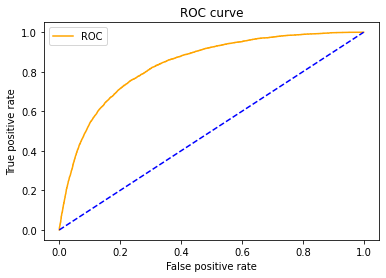




Area under the curve:  0.8367016575512367


In [28]:
plot_roc_curve(fpr, tpr) 
print('\n\n')
print('Area under the curve: ', roc_auc_score(y_val, y_scores))

0.8517418526514814


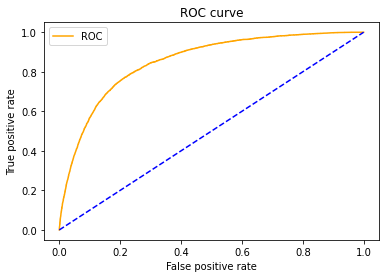




Area under the curve:  0.8517418526514814


In [29]:
# XGboost with tuned hyper parameters 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score


xgb_cls = xgb.XGBClassifier(max_depth = 5, subsample = 1, colsample_bytree = 0.7, colsample_bylevel = 0.7,
    scale_pos_weight = 1,min_child_weight = 1,reg_alpha = 4, n_jobs = 4, objective = 'binary:logistic', gamma = 0.01,
    nthread=20, seed = 27, n_estimators=1000)

xgb_cls.fit(X_train,y_train)

y_pred = xgb_cls.predict_proba(X_val)
y_scores=y_pred[:,1]
fpr, tpr, threshhold = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_val, y_scores)
precision, recall, _ = precision_recall_curve(y_val, y_scores)
print(roc_auc)

plot_roc_curve(fpr, tpr) 
print('\n\n')
print('Area under the curve: ', roc_auc_score(y_val, y_scores))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  7.0min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 15.1min finished


Best Score: 0.8401038385225815
Best parameters set: 
 {'learning_rate': 0.085, 'max_depth': 3, 'subsample': 0.25}
[1 0 1 ... 0 0 0]
[0.56927142 0.03340932 0.63157601 ... 0.22590586 0.13259686 0.33187319]
Best score: 0.840
[0 1]


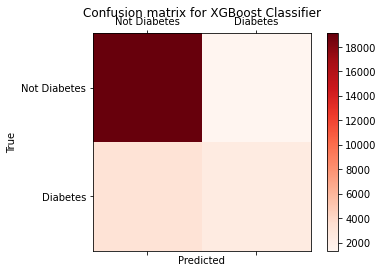

In [31]:
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import GradientBoostingClassifier


# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

# XGboost tunning
xgb = GradientBoostingClassifier(random_state=0)

#xgb.get_params().keys()
xgb_param_grid = {
    'learning_rate': [0.05, 0.085], 
    'max_depth': [1,2,3],
    'subsample': [0.05, 0.1, 0.25]
}
grid_xgb = GridSearchCV(xgb, param_grid = xgb_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

grid_xgb.fit(X_train,y_train)

xgb_best = grid_xgb.best_estimator_
# Best score
print('Best Score:', grid_xgb.best_score_)
print('Best parameters set: \n', grid_xgb.best_params_)

y_pred_xgb = xgb_best.predict(X_val)
print(y_pred_xgb)
y_prob_xgb = xgb_best.predict_proba(X_val)[:,1]
print(y_prob_xgb)
print("Best score: %0.3f" % grid_xgb.best_score_)
y = np.array(y)
class_names = np.unique(y)
print(class_names)

confusion_matrices = [("XGBoost Classifier", confusion_matrix(y_val, y_pred_xgb), roc_auc_score(y_val, y_prob_xgb))]

draw_confusion_matrices(confusion_matrices)

# Feature importance to see the most informative features for the prediction of diabetes mellitus for XGboost

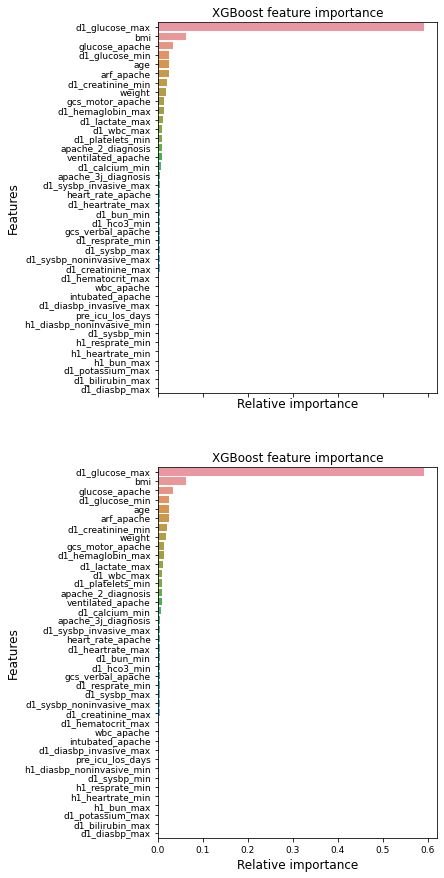

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#nrows = ncols = 2
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(5,15))

names_classifiers = [("XGBoost", xgb_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")

In [34]:
# Take the best solution to predict on test data

y_pred_xgb = xgb_cls.predict(prep_tf)
y_prob_xgb = xgb_cls.predict_proba(prep_tf)[:,1]

In [35]:
prep_tf['diabetes_mellitus'] = y_prob_xgb
prep_tf['encounter_id'] = test_df.copy().encounter_id.values
prep_tf.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,...,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,encounter_id
1,72.0,29.116463,0.0,152.4,0.015278,0.0,83.478729,110.0,104.01,0.0,0.0,44.000000,1.490000,4.0,6.0,0.0,5.0,97.000000,38.0,39.900000,0.0,54.0,31.0,130.000000,36.4,0.0,5.400000,80.118589,0.0,0.845979,-0.727275,0.844240,-0.726652,-1.666605,-1.878348,-5.346188e-16,7.336006e-16,0.953539,-0.643867,0.979238,...,0.059555,0.128857,-1.087316,-0.499297,0.352949,-0.075965,1.524093,1.525188,1.452670e+00,1.127779e+00,-6.982014e-16,-9.512146e-16,2.924590e-16,8.223296e-16,-3.611931e-01,-0.221644,2.368800,1.839880,-1.570292,-1.667247,-1.111864,-1.056512e+00,-9.957046e-01,-9.854868e-01,4.186649,4.188391e+00,2.362019e+00,2.365769,4.098136e+00,4.126368e+00,-0.002159,0,0,0,0,0,0,0,0.068491,144740
2,86.0,29.116463,0.0,175.3,0.000000,0.0,83.478729,117.0,106.01,0.0,0.0,19.000000,0.920000,4.0,6.0,0.0,5.0,73.000000,116.0,32.888448,0.0,41.0,53.0,142.000000,36.3,0.0,12.017957,80.118589,0.0,0.695627,-1.689662,0.693719,-1.687770,0.617789,-0.842446,-5.346188e-16,7.336006e-16,1.237867,-1.474378,1.270113,...,-0.322021,-0.258170,-1.136799,-1.150738,0.602220,0.796008,0.000000,0.000000,1.266141e-15,-1.134629e-15,9.568420e-01,1.596785e+00,2.924590e-16,8.223296e-16,6.948520e-16,0.000000,-0.550594,-0.195028,1.035937,1.358253,0.000000,-3.291543e-16,-4.055471e-15,2.022665e-15,0.000000,3.270622e-16,-2.024493e-15,0.000000,-4.531102e-15,-9.083870e-15,0.000000,0,0,0,0,0,0,0,0.207236,141990
3,72.0,29.116463,0.0,162.6,0.003472,0.0,83.478729,302.0,109.01,0.0,0.0,24.000000,0.770000,4.0,6.0,0.0,5.0,84.000000,104.0,34.800000,0.0,117.0,38.0,137.000000,36.4,0.0,4.600000,80.118589,0.0,0.495159,0.827350,0.493024,0.825922,-0.204593,-0.151845,-5.346188e-16,7.336006e-16,0.669211,0.825501,0.688364,...,-0.462192,-0.460479,-0.311691,-0.852161,1.848574,1.667981,0.144605,0.271259,3.478696e-01,3.133865e-01,2.057389e+00,2.025174e+00,2.924590e-16,8.223296e-16,6.167241e-01,0.645427,-1.037160,-0.565011,0.384379,-0.154497,-0.948760,-1.204750e+00,3.113744e+00,3.113687e+00,1.010276,1.012688e+00,-6.511530e-01,-0.646956,2.312587e+00,2.336550e+00,-1.039978,0,0,0,0,0,0,0,0.176593,142038
4,66.0,29.116463,0.0,177.8,0.884028,0.0,83.478729,113.0,501.05,0.0,0.0,25.110221,1.397522,4.0,6.0,0.0,4.0,161.399236,110.0,32.888448,0.0,61.0,56.0,138.011285,36.6,1.0,12.017957,80.118589,0.0,-0.507184,0.087052,-0.510451,0.086601,0.343661,0.884056,-5.346188e-16,7.336006e-16,0.337495,-0.196668,0.349011,...,0.106278,0.225614,-1.631568,-0.852161,-0.145593,0.142029,-0.366317,-0.053833,-6.197553e-02,2.335440e-01,-6.982014e-16,-9.512146e-16,2.924590e-16,8.223296e-16,1.227922e+00,1.388631,-0.226217,0.359947,-0.701549,-0.370604,2.019733,2.538258e+00,-4.055471e-15,2.022665e-15,0.000000,3.270622e-16,-2.024493e-15,0.000000,-4.531102e-15,-9.083870e-15,0.000000,0,0,0,0,0,0,0,0.156071,138628
5,89.0,29.116463,0.0,170.2,0.

In [36]:
test_id = prep_tf.copy().encounter_id.values
test_preds = prep_tf.diabetes_mellitus.values
submission = pd.DataFrame.from_dict({
    'encounter_id':test_id,
    'diabetes_mellitus':test_preds,
})
submission.to_csv('submission.csv', index=False)

In [37]:
submission = pd.read_csv('submission.csv')
submission.head()

,encounter_id,diabetes_mellitus
0,144740,0.068491
1,141990,0.207236
2,142038,0.176593
3,138628,0.156071
4,141682,0.314109


In [38]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>